In [6]:
import numpy as np
import pandas as pd

In [7]:
# Load dataset
df = pd.read_csv('SpamCollectionSMS.txt', sep='\t', names=["label","message"])

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [11]:
# missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

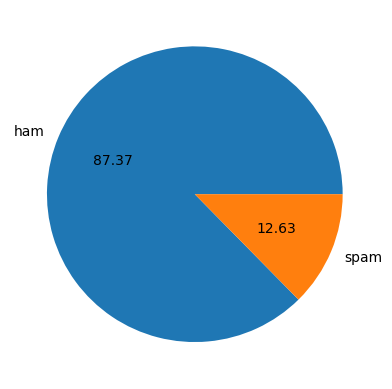

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Apply function to count characters
df["length"] = df["message"].apply(len)

In [18]:
# Apply function to count words
df.loc[:, 'words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
# Apply function to count sentences
df.loc[:, 'sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
# ham
df[df['label'] == 0][['length','words','sentences']].describe()

,length,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.988043,17.273472,1.827724
std,56.739047,13.604143,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# spam
df[df['label'] == 1][['length','words','sentences']].describe()

,length,words,sentences
count,653.000000,653.000000,653.000000
mean,138.130168,27.764165,2.986217
std,29.937254,6.993827,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<Axes: xlabel='length', ylabel='Count'>

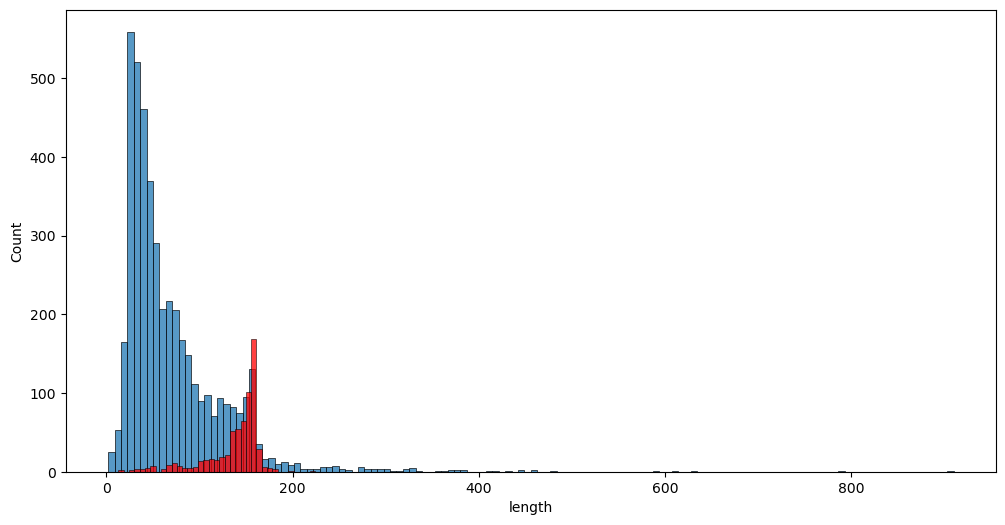

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['length'])
sns.histplot(df[df['label'] == 1]['length'],color='red')

<Axes: xlabel='words', ylabel='Count'>

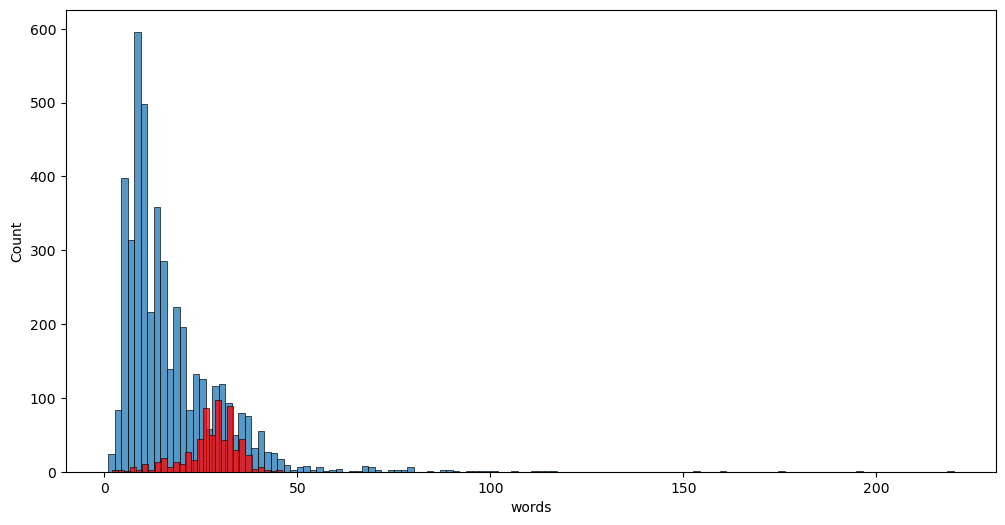

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['words'])
sns.histplot(df[df['label'] == 1]['words'],color='red')

<Axes: xlabel='sentences', ylabel='Count'>

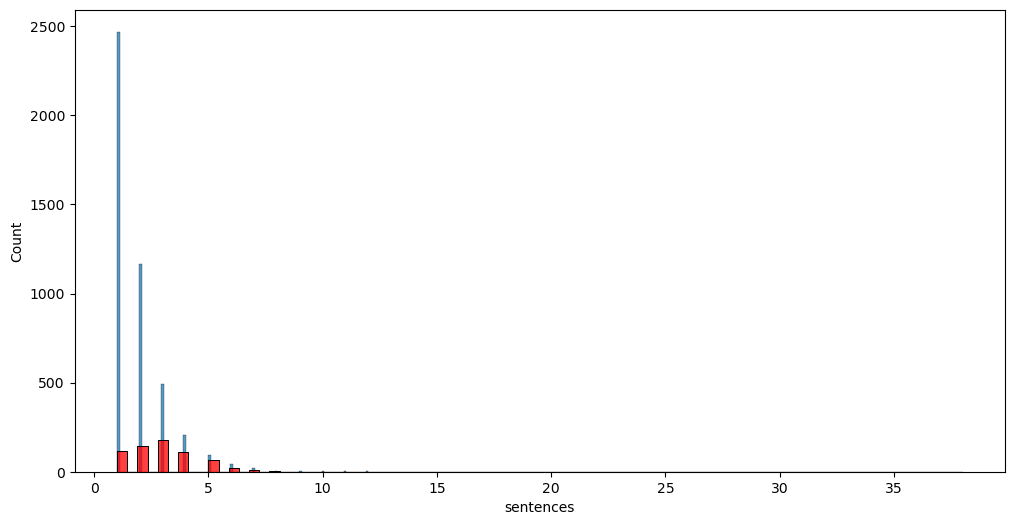

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['sentences'])
sns.histplot(df[df['label'] == 1]['sentences'],color='red')

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

def transform_text(message):
    # Convert the message to lowercase
    message = message.lower()
    
    # Tokenize the message into words
    message = nltk.word_tokenize(message)
    
    # Initialize an empty list to store cleaned words
    y = []
    
    # Loop through each word in the tokenized message
    for i in message:
        # Check if the word is alphanumeric
        if i.isalnum():
            # If the word is alphanumeric, append it to the list
            y.append(i)
    
    # Update 'message' with the cleaned list of words
    message = y[:]
    
    # Clear the temporary list 'y'
    y.clear()
    
    # Loop through each word in the cleaned message
    for i in message:
        # Check if the word is not a stopword and not a punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            # If the word passes the conditions, append its stem to the list
            y.append(ps.stem(i))
    
    # Update 'message' with the stemmed list of words
    message = y[:]
    
    # Clear the temporary list 'y'
    y.clear()
    
    # Loop through each word in the stemmed message
    for i in message:
        # Append the stemmed word to the list
        y.append(ps.stem(i))
    
    # Join the stemmed words into a single string and return it
    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
from nltk.stem.porter import PorterStemmer
# Initialize the Porter Stemmer
ps = PorterStemmer()
# Apply stemming to the word 'loving'
ps.stem('loving')

'love'

In [34]:
df['transformed_text'] = df['message'].apply(transform_text)

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

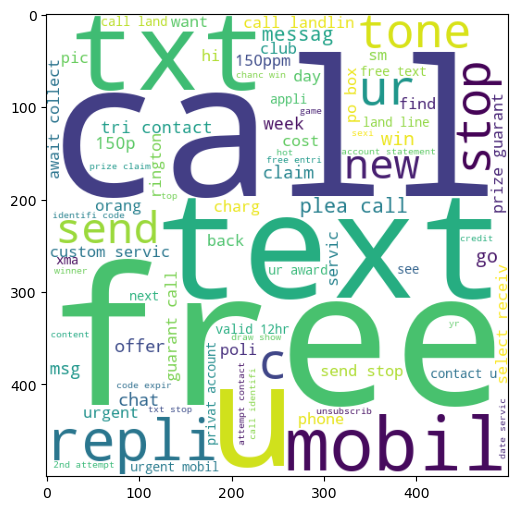

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

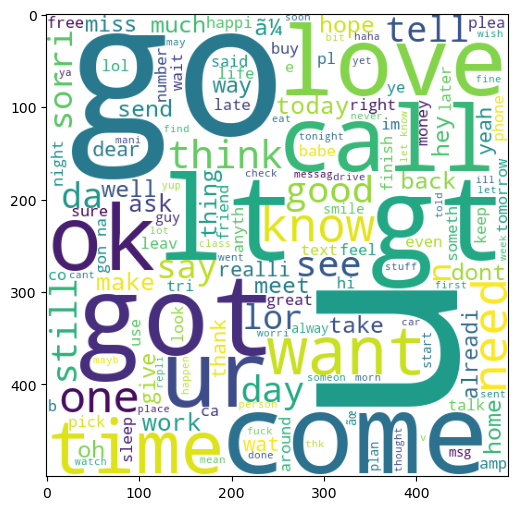

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

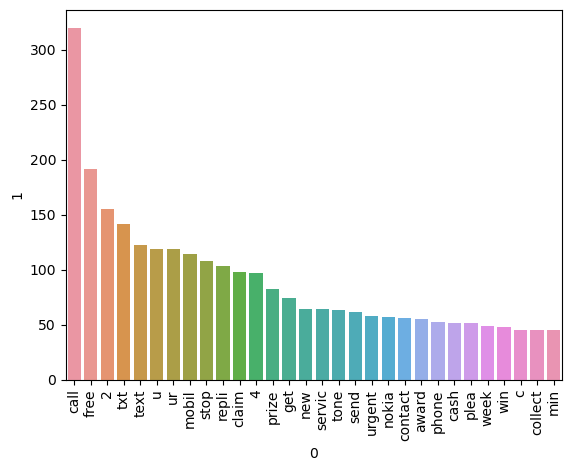

In [41]:
from collections import Counter
# Count the occurrences of each word in the spam_corpus list
word_counts = Counter(spam_corpus)
# Create a DataFrame with the most common 30 words and their counts
word_counts_df = pd.DataFrame(word_counts.most_common(30))
# Plotting
sns.barplot(x=word_counts_df[0], y=word_counts_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

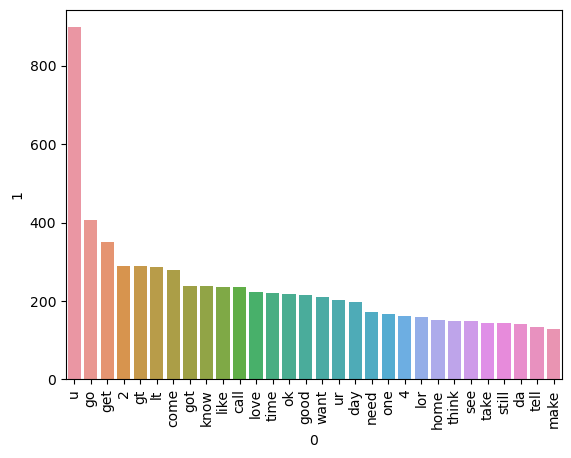

In [43]:
# Count the occurrences of each word in the ham_corpus list
word_counts = Counter(ham_corpus)
# Create a DataFrame with the most common 30 words and their counts
word_counts_df = pd.DataFrame(word_counts.most_common(30))
# Plotting
sns.barplot(x=word_counts_df[0], y=word_counts_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Text Vectorization
# using Bag of Words

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [52]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.971953578336557
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       910
           1       1.00      0.77      0.87       124

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[910   0]
 [ 29  95]]


In [59]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [60]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [61]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [62]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [63]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9902912621359223


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [66]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [67]:
from sklearn.ensemble import StackingClassifier

In [68]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [69]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))